In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/credit-card-data.csv


In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings(action="ignore")

In [40]:
import pandas as pd
credit_segmentation=pd.read_csv('/kaggle/input/credit-card-data.csv')

In [41]:
dataset=pd.read_csv('/kaggle/input/credit-card-data.csv')

In [42]:
credit_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

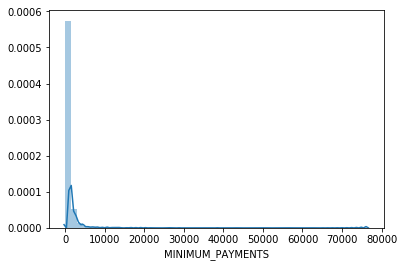

In [43]:
import seaborn as  sns
sns.distplot(credit_segmentation['MINIMUM_PAYMENTS'].dropna())

In [44]:
credit_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

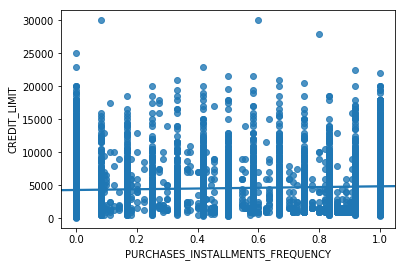

In [45]:
sns.regplot(x='PURCHASES_INSTALLMENTS_FREQUENCY',y='CREDIT_LIMIT',data=credit_segmentation)

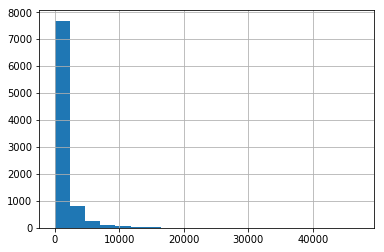

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
credit_segmentation['CASH_ADVANCE'].hist(bins=20)

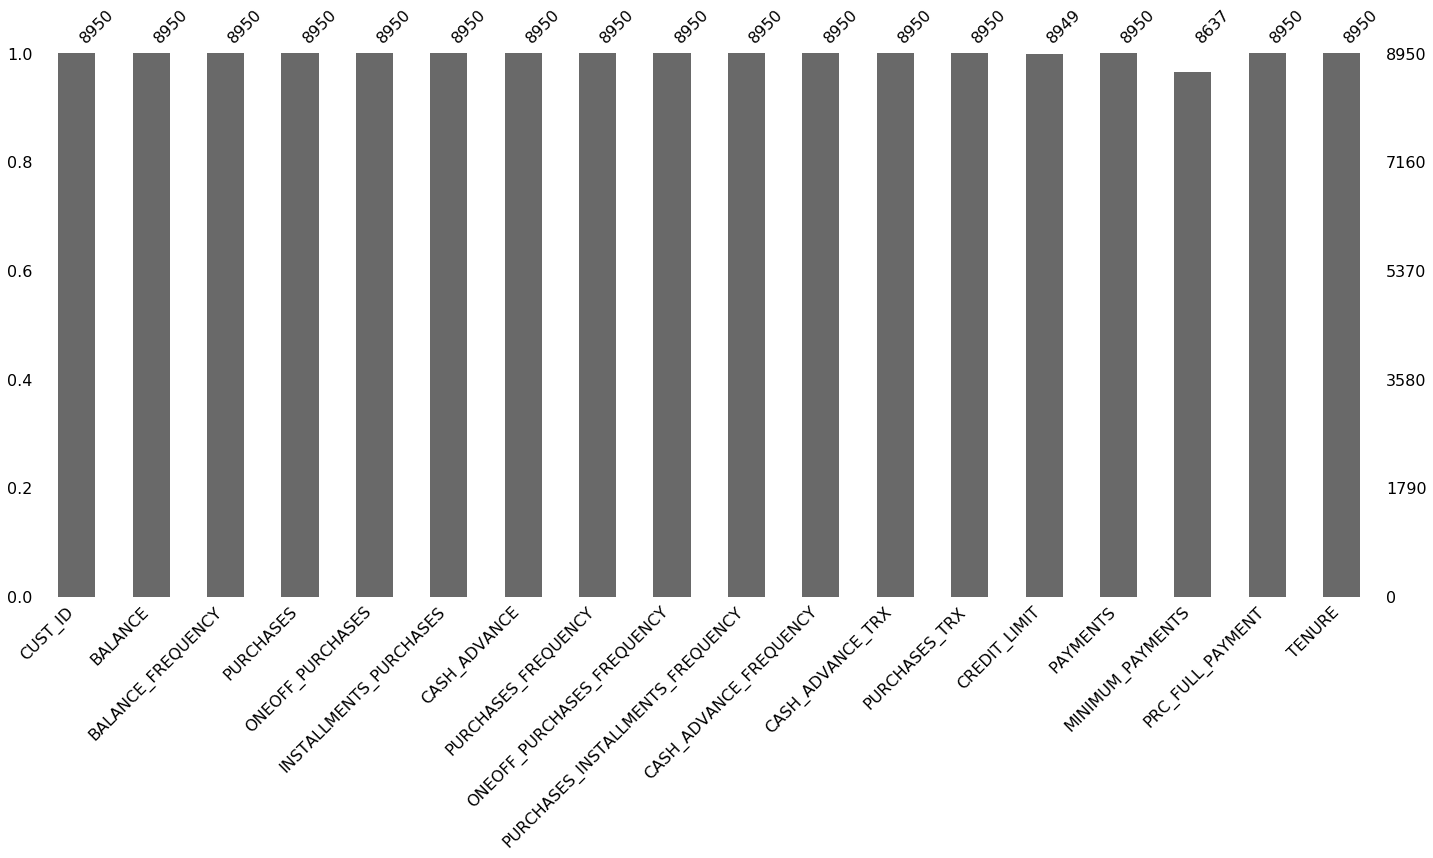

In [47]:
import missingno as msno
msno.bar(credit_segmentation)

In [48]:
from scipy import stats
numerical_columns = credit_segmentation.select_dtypes(include=[np.number]).columns
for i in credit_segmentation[numerical_columns].columns:
    k2, p = stats.normaltest(credit_segmentation[i].dropna())
    alpha = 1e-3
    print("p = {:g}".format(p))
    p = 3.27207e-11
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print('data is  not normally distributed') 
        credit_segmentation[i].fillna(credit_segmentation[i].median(),inplace=True)
    else:
        print("The null hypothesis cannot be rejected")
        credit_segmentation[i].fillna(credit_segmentation[i].mean(),inplace=True)


p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed
p = 0
data is  not normally distributed


In [49]:
credit_segmentationi_original=credit_segmentation.copy()

In [50]:
credit_segmentation.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [51]:
dataset=credit_segmentation.drop('CUST_ID', axis=1)

In [52]:
Q1 = credit_segmentation[numerical_columns].quantile(0.25)
Q3 = credit_segmentation[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

BALANCE                             1925.858120
BALANCE_FREQUENCY                      0.111111
PURCHASES                           1070.495000
ONEOFF_PURCHASES                     577.405000
INSTALLMENTS_PURCHASES               468.637500
CASH_ADVANCE                        1113.821139
PURCHASES_FREQUENCY                    0.833334
ONEOFF_PURCHASES_FREQUENCY             0.300000
PURCHASES_INSTALLMENTS_FREQUENCY       0.750000
CASH_ADVANCE_FREQUENCY                 0.222222
CASH_ADVANCE_TRX                       4.000000
PURCHASES_TRX                         16.000000
CREDIT_LIMIT                        4900.000000
PAYMENTS                            1517.858151
MINIMUM_PAYMENTS                     617.855846
PRC_FULL_PAYMENT                       0.142857
TENURE                                 0.000000
dtype: float64


In [53]:
((credit_segmentation[numerical_columns] < (Q1 - 1.5 * IQR)) |(credit_segmentation[numerical_columns] > (Q3 + 1.5 * IQR))).sum().reset_index()


,index,0
0,BALANCE,695
1,BALANCE_FREQUENCY,1493
2,PURCHASES,808
3,ONEOFF_PURCHASES,1013
4,INSTALLMENTS_PURCHASES,867
5,CASH_ADVANCE,1030
6,PURCHASES_FREQUENCY,0
7,ONEOFF_PURCHASES_FREQUENCY,782
8,PURCHASES_INSTALLMENTS_FREQUENCY,0
9,CASH_ADVANCE_FREQUENCY,525


since there are so many outliers  so we can removing them will cause loss of data  so we will go for log tranformation

In [54]:
credit_segmentation.drop('CUST_ID', axis=1, inplace=True)

In [55]:
credit_segmentation['PURCHASES']

0         95.40
1          0.00
2        773.17
3       1499.00
4         16.00
         ...   
8945     291.12
8946     300.00
8947     144.40
8948       0.00
8949    1093.25
Name: PURCHASES, Length: 8950, dtype: float64

In [56]:
cols = ['BALANCE',
        'PURCHASES',
        'ONEOFF_PURCHASES',
        'INSTALLMENTS_PURCHASES',
        'CASH_ADVANCE',
        'CASH_ADVANCE_TRX',
        'PURCHASES_TRX',
        'CREDIT_LIMIT',
        'PAYMENTS',
        'MINIMUM_PAYMENTS']
credit_segmentation[cols] = np.log(1+credit_segmentation[cols])
credit_segmentation['PURCHASES']

0       4.568506
1       0.000000
2       6.651791
3       7.313220
4       2.833213
          ...   
8945    5.677165
8946    5.707110
8947    4.979489
8948    0.000000
8949    6.997824
Name: PURCHASES, Length: 8950, dtype: float64

In [57]:
((credit_segmentation[numerical_columns] < (Q1 - 1.5 * IQR)) |(credit_segmentation[numerical_columns] > (Q3 + 1.5 * IQR))).sum().reset_index()


,index,0
0,BALANCE,0
1,BALANCE_FREQUENCY,1493
2,PURCHASES,0
3,ONEOFF_PURCHASES,0
4,INSTALLMENTS_PURCHASES,0
5,CASH_ADVANCE,0
6,PURCHASES_FREQUENCY,0
7,ONEOFF_PURCHASES_FREQUENCY,782
8,PURCHASES_INSTALLMENTS_FREQUENCY,0
9,CASH_ADVANCE_FREQUENCY,525


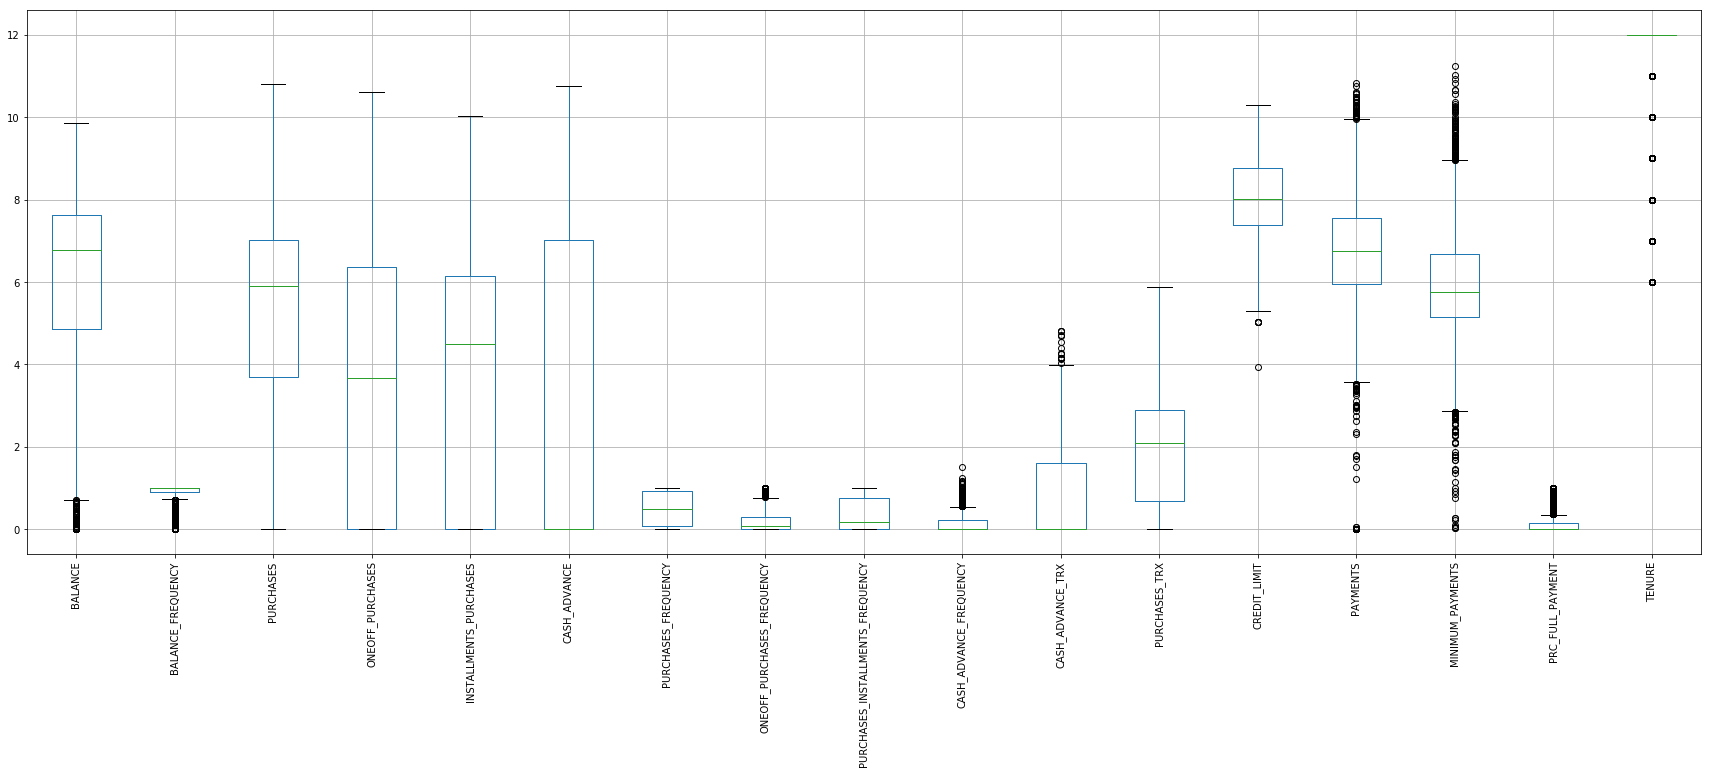

In [58]:
credit_segmentation.boxplot(rot=90, figsize=(30,10))


In [59]:
scale = StandardScaler()
X = scale.fit_transform(credit_segmentation)
X.shape

(8950, 17)

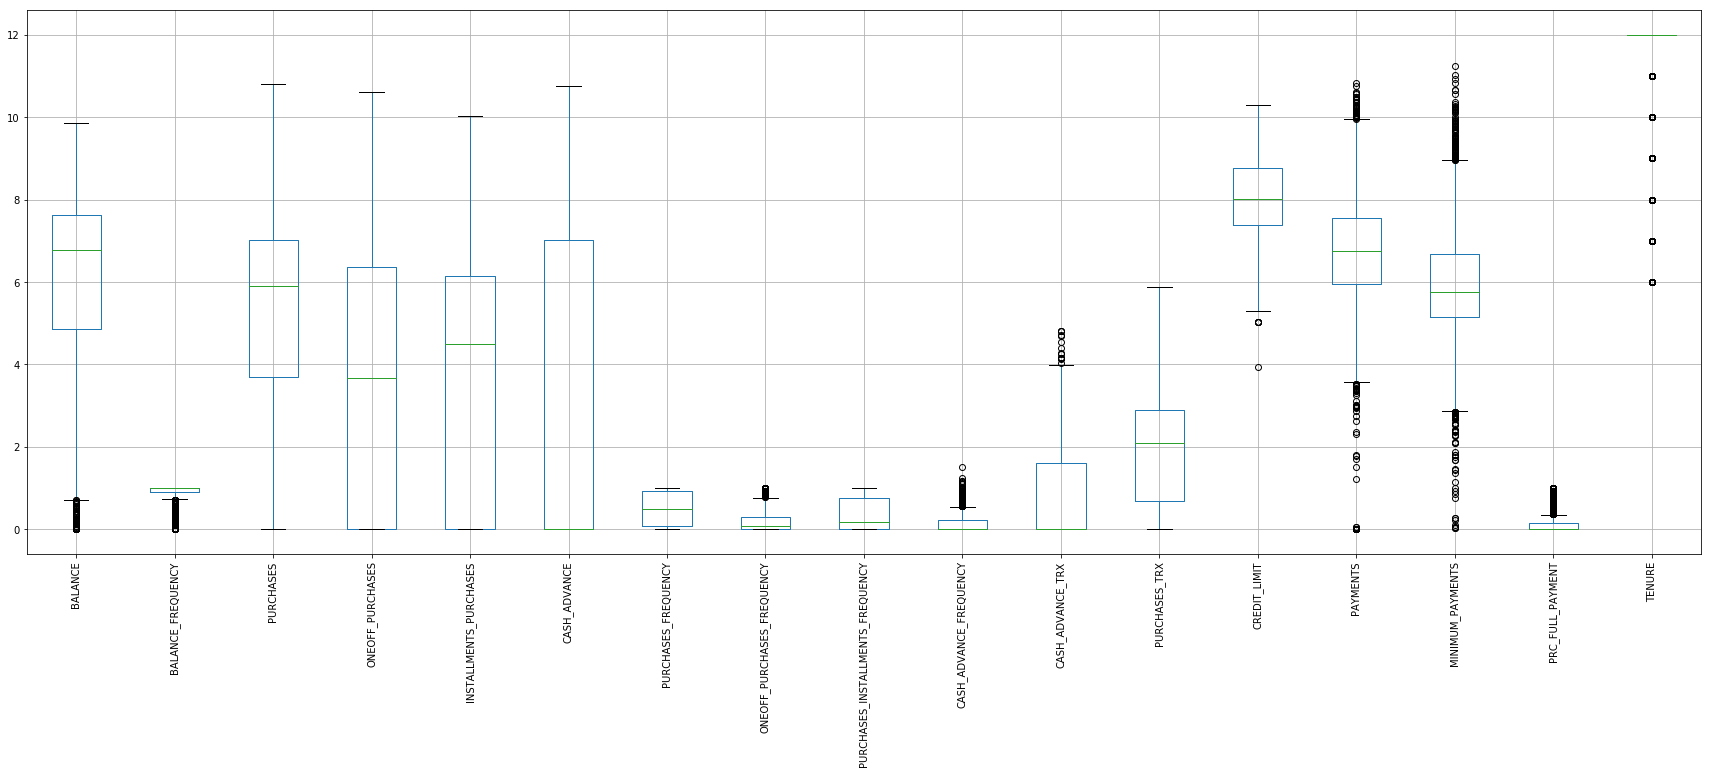

In [60]:
credit_segmentation.boxplot(rot=90, figsize=(30,10))


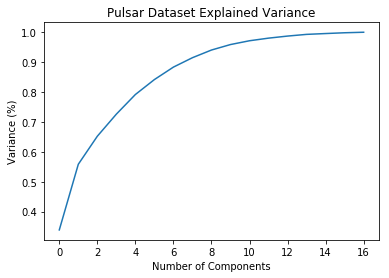

In [61]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [62]:
dist = 1 - cosine_similarity(X)

pca = PCA(10)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 10)

In [63]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i,init = 'k-means++')
    kmean.fit(X_PCA)
    cost.append(kmean.inertia_)  

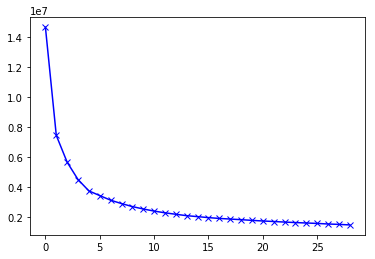

In [64]:
plt.plot(cost, 'bx-')

In [65]:
kmean= KMeans(4,init = 'k-means++', random_state = 42)
kmean.fit(X_PCA)
labels=kmean.labels_

In [66]:
labels.size

8950

In [67]:
X.shape

(8950, 17)

In [68]:
credit_segmentation

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,12
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,1.000000,5.677165,0.000000,5.677165,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.500000,6
8946,3.004851,1.000000,5.707110,0.000000,5.707110,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,1.945910,6.908755,5.623517,5.747301,0.000000,6
8947,3.194529,0.833333,4.979489,0.000000,4.979489,0.000000,0.833333,0.000000,0.666667,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.250000,6
8948,2.671218,0.833333,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.166667,1.098612,0.000000,6.216606,3.980615,4.038755,0.250000,6


In [69]:
clusters=pd.concat([credit_segmentationi_original, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [71]:
clusters[clusters['cluster']==1].shape[0]/clusters.shape[0]

0.32167597765363126

In [72]:
clusters.groupby(by='cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,2277.723633,0.920068,53.499328,49.127403,4.418937,2070.147572,0.037801,0.028325,0.008083,0.286468,6.770093,0.566461,4160.653482,1674.749520,1041.147282,0.031351,11.397604
1,928.008285,0.956521,1970.407725,1064.773928,906.057996,22.895459,0.885671,0.348066,0.727327,0.006905,0.098645,29.881556,4872.811038,1886.361657,613.621219,0.302894,11.813477
2,330.725536,0.634516,369.043405,262.515421,107.037033,53.053204,0.336333,0.111956,0.206984,0.013380,0.203086,4.760577,3348.274733,698.078767,273.831186,0.180065,11.241414
3,3236.863969,0.978202,1645.871750,1073.470237,572.619294,2191.895947,0.722705,0.347144,0.495923,0.285891,7.370421,23.469471,5902.679783,2947.157574,1730.450511,0.041267,11.525102


In [85]:
clusters.drop(columns=['CUST_ID'],inplace=True)

In [76]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

TypeError: '(slice(0, None, None), slice(1, None, None))' is an invalid key